<a href="https://colab.research.google.com/github/valerio-unifei/UNIFEI-IA-Aulas/blob/main/UNIFEI_IA_01_Espa%C3%A7o_de_Busca_Pre%C3%A7o_de_Celulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Prediction

<img src= "https://media.giphy.com/media/l2Je009VFaSbLJQiI/giphy.gif">

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

**Contexto**

Bob iniciou sua própria empresa de telefonia móvel. Ele quer brigar duramente com grandes empresas como Apple, Samsung etc.

Ele não sabe estimar o preço dos celulares que sua empresa cria. Neste competitivo mercado de telefonia móvel, você não pode simplesmente assumir as coisas. Para resolver esse problema, ele coleta dados de vendas de telefones celulares de várias empresas.

Bob deseja descobrir alguma relação entre os recursos de um telefone móvel (por exemplo: - RAM, memória interna, etc.) e seu preço de venda. Mas ele não é muito bom em aprendizado de máquina. Ele precisa da sua ajuda para resolver esse problema.

Neste problema, você não precisa prever o preço real, mas uma faixa de preço indicando quão alto é o preço

# Bibliotecas

In [14]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print('Numpy versão:',np.__version__)
print('Pandas versão:',pd.__version__)
print('Seaborn versão:',sns.__version__)

Numpy versão: 1.19.5
Pandas versão: 1.1.5
Seaborn versão: 0.11.1


# Base de Dados (*Dataset*)

**Carregando e Verificando Dataset**

In [1]:
# baixando e extraindo dataset
!wget 'https://github.com/valerio-unifei/UNIFEI-IA-Aulas/raw/main/Mobile%20Price%20Classification.zip'
!unzip 'Mobile Price Classification.zip' -d '/content/'

--2021-04-06 15:04:28--  https://github.com/valerio-unifei/UNIFEI-IA-Aulas/raw/main/Mobile%20Price%20Classification.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/valerio-unifei/UNIFEI-IA-Aulas/main/Mobile%20Price%20Classification.zip [following]
--2021-04-06 15:04:28--  https://raw.githubusercontent.com/valerio-unifei/UNIFEI-IA-Aulas/main/Mobile%20Price%20Classification.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72340 (71K) [application/zip]
Saving to: ‘Mobile Price Classification.zip’

Mobile Price Classi 100%[===================>]  70.64K  --.-KB/s    in 0.01s   

2021-04-06 15:

In [15]:
trainDS = pd.read_csv('train.csv')
trainDS.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [16]:
trainDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Estatística Descritiva do Dataset**

In [17]:
trainDS.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Análise de Dados

Analisando parâmetros pelo preço final

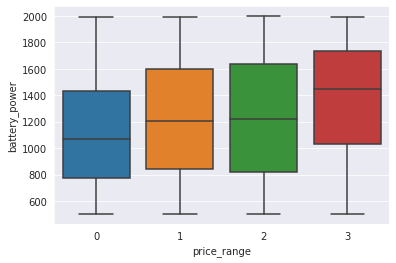

In [19]:
sns.boxplot(data=trainDS,x='price_range',y='battery_power')

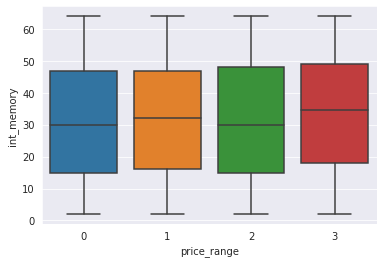

In [22]:
sns.boxplot(data=trainDS,x='price_range',y='int_memory')

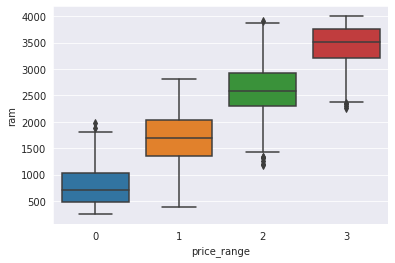

In [23]:
sns.boxplot(data=trainDS,x='price_range',y='ram')

**Correlações entre parâmetros** - colunas 'repetidas'

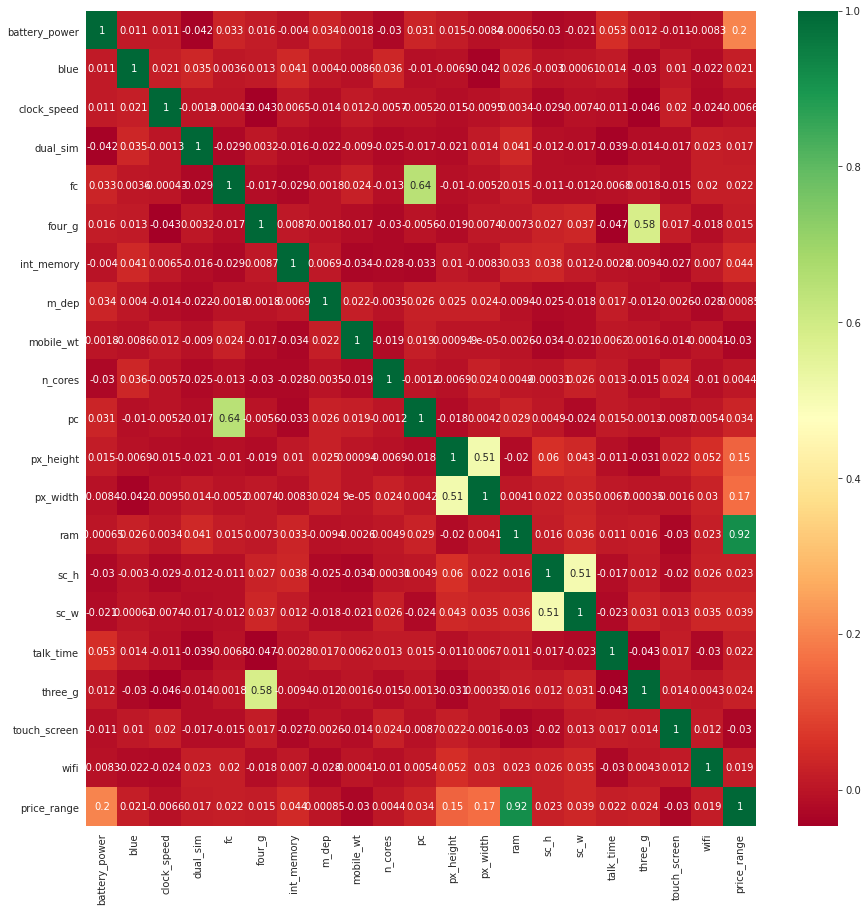

In [25]:
corr = trainDS.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr ,annot=True,cmap="RdYlGn")